<a href="https://colab.research.google.com/github/venkatesh-manikumar/Python_learnings/blob/main/NB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [333]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report

from sklearn.naive_bayes import MultinomialNB

In [ ]:
diabetes_data = pd.read_csv('/content/drive/MyDrive/DataScience/NB/diabetes.csv')
diabetes_data.columns.str.strip()

Index(['Number of times pregnant', 'Plasma glucose concentration',
       'Diastolic blood pressure', 'Triceps skin fold thickness',
       '2-Hour serum insulin', 'Body mass index', 'Diabetes pedigree function',
       'Age (years)', 'Class variable'],
      dtype='object')

In [ ]:
spam_data = pd.read_csv('/content/drive/MyDrive/DataScience/NB/spam.tsv',sep='\t') 
spam_data.columns
spam_data.head()

,ham,I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.
0,spam,Free entry in 2 a wkly comp to win FA Cup fina...
1,ham,"Nah I don't think he goes to usf, he lives aro..."
2,ham,Even my brother is not like to speak with me. ...
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!!
4,ham,As per your request 'Melle Melle (Oru Minnamin...


In [ ]:
diabetes_data.shape

(768, 9)

In [ ]:
diabetes_data.head()

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function,Age (years),Class variable
0,6,148,72,35,0,33.6,0.627,50,YES
1,1,85,66,29,0,26.6,0.351,31,NO
2,8,183,64,0,0,23.3,0.672,32,YES
3,1,89,66,23,94,28.1,0.167,21,NO
4,0,137,40,35,168,43.1,2.288,33,YES


Index(['Number of times pregnant', ' Plasma glucose concentration',
       ' Diastolic blood pressure', ' Triceps skin fold thickness',
       ' 2-Hour serum insulin', ' Body mass index',
       ' Diabetes pedigree function', ' Age (years)', ' Class variable'],
      dtype='object')

In [ ]:
X = diabetes_data.drop(' Class variable' , 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [ ]:
X[:4]

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function,Age (years)
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21


In [ ]:
Y = diabetes_data.iloc[:,-1]
Y[:4]

0    YES
1     NO
2    YES
3     NO
Name:  Class variable, dtype: object

## TEST/TRAIN SPLIT

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3 , random_state = 1)

In [ ]:
print('x_train.shape' , x_train.shape)
print('x_test.shape' , x_test.shape)

print('y_train.shape' , y_train.shape)
print('y_test.shape' , y_test.shape)

x_train.shape (537, 8)
x_test.shape (231, 8)
y_train.shape (537,)
y_test.shape (231,)


## MODELLING

In [ ]:
model =  GaussianNB()

In [ ]:
model.fit(x_train,y_train)

GaussianNB()

## PREDICTION 

In [ ]:
y_pred = model.predict(x_test)

In [312]:
y_test[:4].index

Int64Index([285, 101, 581, 352], dtype='int64')

In [310]:
y_pred[:4]

array(['NO', 'NO', 'NO', 'NO'], dtype='<U3')

## ACCURACY SCORE

In [ ]:
acc_score = accuracy_score(y_test,y_pred)
acc_score

0.7835497835497836

## CONFUSION MATRIX

In [334]:
confusion_matrix(y_test , y_pred)

array([[128,  18],
       [ 32,  53]])

## CLASSIFICATION REPORT

In [336]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

          NO       0.80      0.88      0.84       146
         YES       0.75      0.62      0.68        85

    accuracy                           0.78       231
   macro avg       0.77      0.75      0.76       231
weighted avg       0.78      0.78      0.78       231



In [338]:
!pip install -U scikit-learn

In [339]:
! pip install yellowbrick

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  "X does not have valid feature names, but"


0.7835497835497836

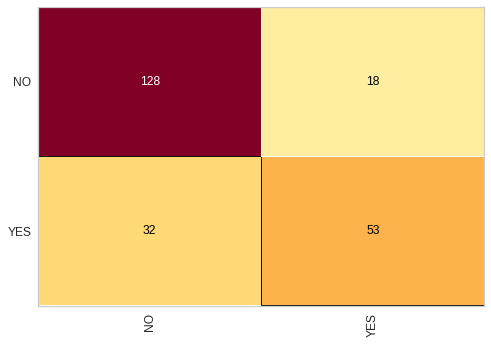

In [343]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix (model , classes = ['NO','YES'])
cm.fit(x_test , y_test)
cm.score(x_test , y_test)

## MIS-PREDICTED DATA

In [329]:
mapped = zip(y_pred,y_test)
df = pd.DataFrame(list(mapped),columns=['y_pred','y_test'] , index = y_test.index )

In [330]:
conditions = [
    (df['y_pred'] == df['y_test']),
    (df['y_pred'] != df['y_test'])
]
values = ['True','False']

In [331]:
df['prediction'] = np.select(conditions, values)
x_test.loc[df.loc[df.prediction == 'False'].index].head()

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function,Age (years)
19,1,115,70,30,96,34.6,0.529,32
493,4,125,70,18,122,28.9,1.144,45
218,5,85,74,22,0,29.0,1.224,32
667,10,111,70,27,0,27.5,0.141,40
750,4,136,70,0,0,31.2,1.182,22
